Programmer Name: Miss.Mariyam Nazaa Zuhair / TP049962 / UC3F2007CS(DA) | Supervisor: Dr.Kadhar Batcha / 2nd Marker: Mrs.Hema Latha Krishna Nair

## Data Analysis for the Customer Segmentation System

This file contains the data exploration and analysis conducted in order to determine the requirements for the creation of the Customer segmentaion System.

The Data for this analysis was obtained from the <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">UCL Machine Learning Repository</a>, Titled as: Online Retail Data Set, and consists transactional records dating from 1st Dec 2010 to 9th Dec 2011 for a total period of one year.

In this analysis I am going to be following the following steps:

1. Initial Data set exploration 
2. Exploratory data Anlaysis
2. Converting datset to RFM model
3. Applying k-means and Hierachical Clustering to the dataset
4. Comparing the results 

In [1]:
# import required libraries for dataframe and visualization
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta, date
import time
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
import plotly
import plotly.graph_objs as go


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, classification_report,confusion_matrix
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import KFold, cross_val_score, train_test_split


#from __future__ import division

%matplotlib inline

#import xgboost as xgb

### 1. Initial Data Exploration 

This is step is carried out in order to first understand the Dataset attributes and features.

In [2]:
# import the dataset
sys.path
df = pd.read_csv('C:\\Users\\Naza Zuhair\\Downloads\\OnlineRetail\\OnlineRetail.csv',encoding='ISO-8859-1')

In [3]:
# check no of rows and cloumns
df.shape

(541909, 8)

In [4]:
#check dataset attributes
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
#print the first 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
#distribution of the data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# check number of unique values in each column/attribute
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64



### 2. Exploratory Data Analysis

In this part, I am going to be cleaning the data, removing duplicate values, changing data types, conducting, univariate, bivariate and multivariate analysis with different visualizations. 


In [10]:
#removing missing values
dfn = df.dropna()
dfn.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# remove duplicate values
dfn = dfn.drop_duplicates()
dfn.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [12]:
#removing negative values 
dfn =dfn[dfn.Quantity>0]
dfn.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
#changing attribute data types

#date from object to datetime
dfn['InvoiceDate'] = pd.to_datetime(dfn.InvoiceDate, format='%d-%m-%Y %H:%M')
#change Customer Id from float to string
dfn['CustomerID'] = dfn['CustomerID'].astype(str)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [14]:
#no null/missing values remaining
dfn.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
#number of rows and column present after data cleaning
dfn.shape

(392732, 8)

In [16]:
#Multiply quantity and UnitPrice to get total sales
dfn["Amount"] = dfn.Quantity.values * dfn.UnitPrice.values
dfn['Amount'] = dfn['Amount'].astype(int)

dfn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20


In [17]:
#attribute cistribution in the modified dataset
dfn.describe()

,Quantity,UnitPrice,Amount
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,22.138143
std,181.588420,22.240725,311.089989
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.000000
50%,6.000000,1.950000,12.000000
75%,12.000000,3.750000,19.000000
max,80995.000000,8142.750000,168469.000000


In [18]:
#divide the date time column into seperate day, month, year and time columns
dfn['year'] = pd.DatetimeIndex(dfn['InvoiceDate']).year
dfn['Month'] = pd.DatetimeIndex(dfn['InvoiceDate']).month
dfn['Year_month'] = pd.to_datetime(dfn['InvoiceDate']).dt.to_period('M')
dfn['Day'] = pd.DatetimeIndex(dfn['InvoiceDate']).day
dfn['Hour'] = pd.DatetimeIndex(dfn['InvoiceDate']).hour
dfn.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,Month,Year_month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15,2010,12,2010-12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22,2010,12,2010-12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8


Next, I am going to do different visualizations for exploration.

Text(0, 0.5, 'Country')

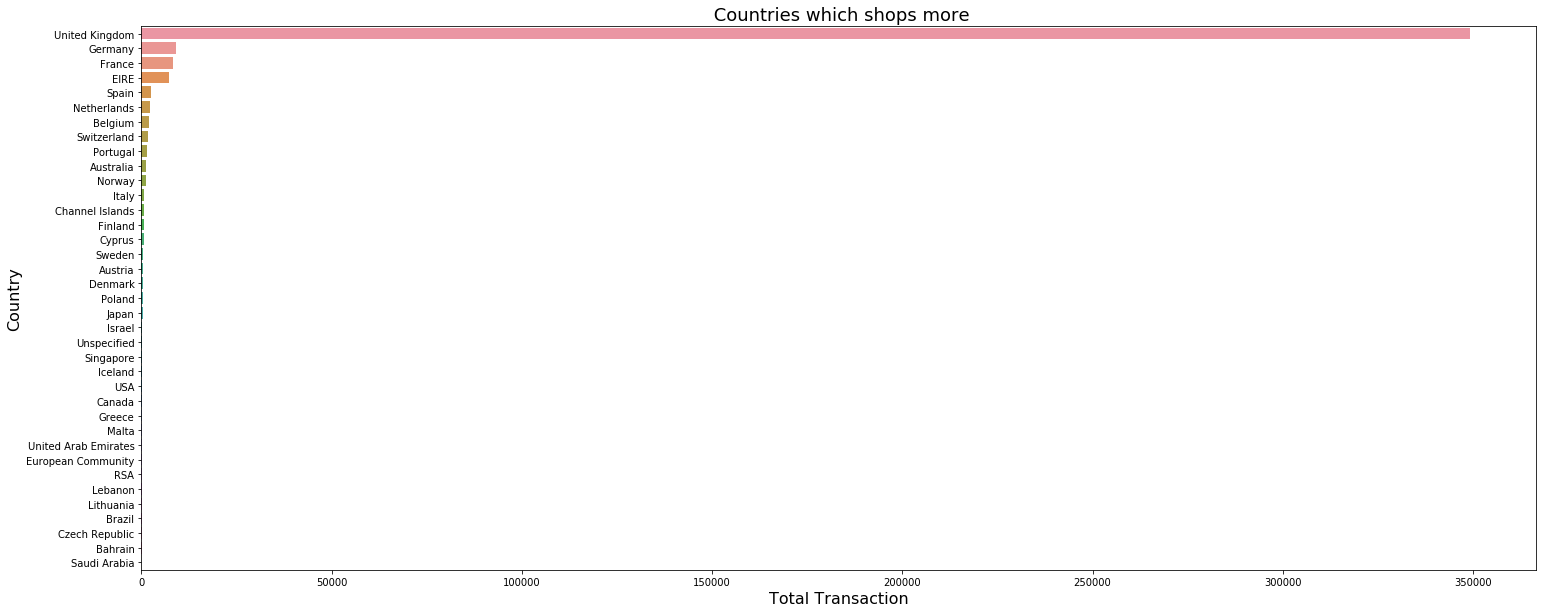

In [19]:
# Countries by Total Transaction Numbers
most_order = dfn.groupby('Country', as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate', ascending= False)
most_order.columns = ['Country', 'Total_Transactions']
fig = plt.figure(figsize=(25, 10))
X_axis = most_order['Total_Transactions']
Y_axis = most_order['Country']
sns.barplot(X_axis, Y_axis)
plt.title(' Countries which shops more', fontsize=18)
plt.xlabel('Total Transaction', fontsize=16)
plt.ylabel('Country', fontsize=16)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

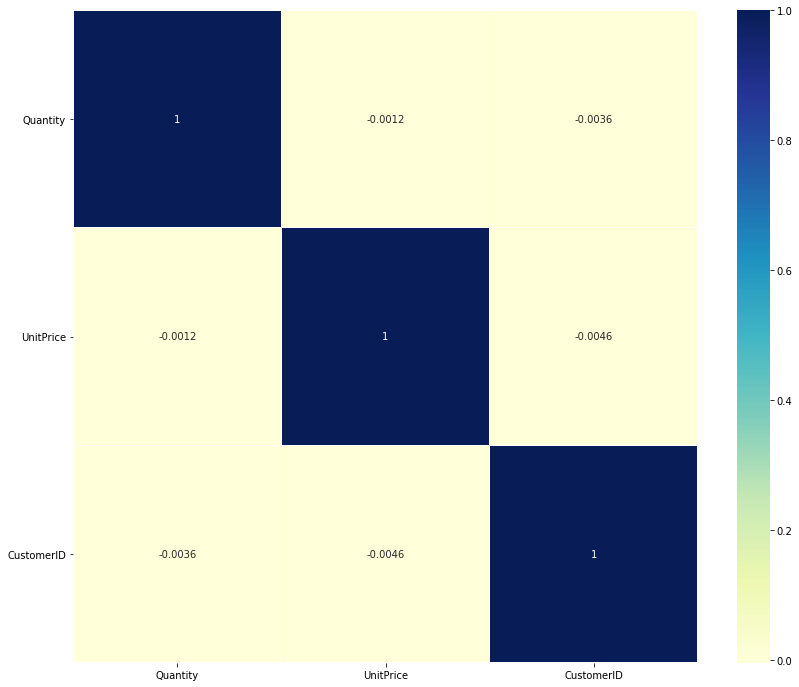

In [20]:
#heatmap for original dataset
plt.figure(figsize =(14,12))
sns.heatmap(df.corr(), linewidths =.1, cmap ="YlGnBu", annot= True)
plt.yticks(rotation =0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

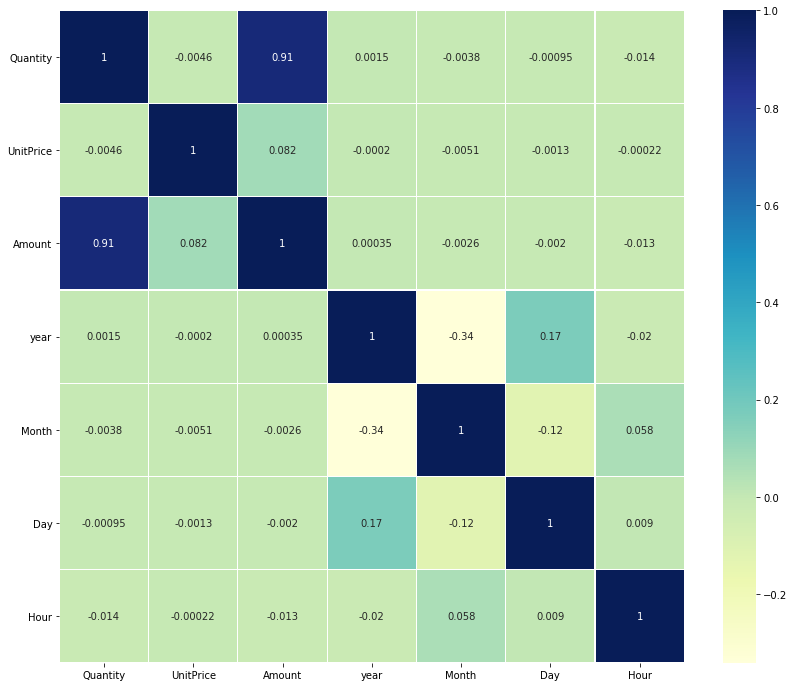

In [21]:
#heatmap showing correlation between variables-modified dataset
plt.figure(figsize =(14,12))
sns.heatmap(dfn.corr(), linewidths =.1, cmap ="YlGnBu", annot= True)
plt.yticks(rotation =0)

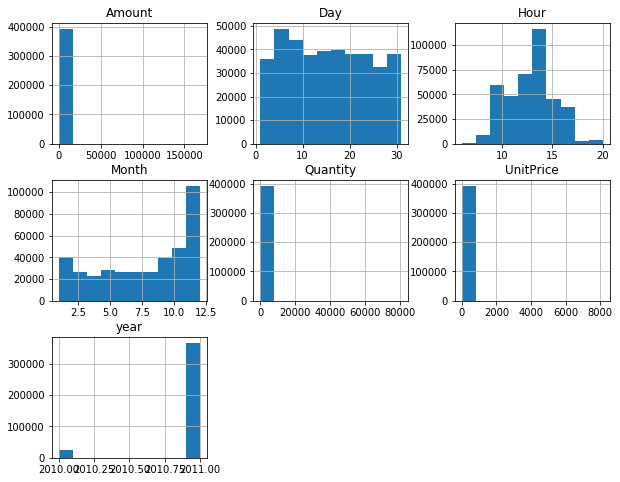

In [22]:
#histograms for all the attributes
hist = dfn.hist(bins = 10, figsize=(10,8))

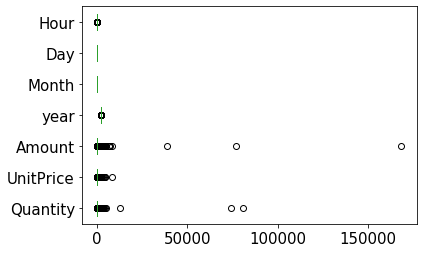

In [23]:
# boxplot shows distribution and outliers
boxplot = dfn.boxplot(grid=False, vert=False, fontsize =15)

In [24]:
#pearsons correlation coefficient table
corr = dfn.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(6) 

,Quantity,UnitPrice,Amount,year,Month,Day,Hour
Quantity,1.000000,-0.004577,0.908879,0.001511,-0.003839,-0.000947,-0.014400
UnitPrice,-0.004577,1.000000,0.081599,-0.000202,-0.005065,-0.001297,-0.000220
Amount,0.908879,0.081599,1.000000,0.000348,-0.002556,-0.001991,-0.013140
year,0.001511,-0.000202,0.000348,1.000000,-0.340596,0.168141,-0.019777
Month,-0.003839,-0.005065,-0.002556,-0.340596,1.000000,-0.117208,0.058412
Day,-0.000947,-0.001297,-0.001991,0.168141,-0.117208,1.000000,0.008967
Hour,-0.014400,-0.000220,-0.013140,-0.019777,0.058412,0.008967,1.000000


### 3. Building the RFM model dataset

(Recency, Frequency, Monetary)


In [25]:
#generating monetary value

#monetary = quatity x Unit price , this is the amount column I had created previously
monetary = dfn.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346.0,77183
1,12347.0,4251
2,12348.0,1786
3,12349.0,1718
4,12350.0,329
...,...,...
4334,18280.0,175
4335,18281.0,78
4336,18282.0,171
4337,18283.0,1677


In [26]:
#generating frequency value

#equal to the number of Invoices generated by each customer
frequency = dfn.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [27]:
#finding out the last date in the dataset
MaxDate = max(dfn.InvoiceDate)
MaxDate

Timestamp('2011-12-09 12:50:00')

In [28]:
## Add one More Day in MaxDate to get Last Date:
MaxDate = MaxDate + pd.DateOffset(days = 1)
MaxDate
# the difference bbetween the Last Date and Last purchase is Recency 
dfn["Diff"] = MaxDate - dfn.InvoiceDate
dfn.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,Month,Year_month,Day,Hour,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15,2010,12,2010-12,1,8,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22,2010,12,2010-12,1,8,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,2010,12,2010-12,1,8,374 days 04:24:00


In [29]:
#Convert the Diff column to just days, this is Recency 
recency = dfn.groupby("CustomerID").Diff.min()
recency = recency.reset_index()
recency
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [30]:
#merge the three atribute columns with customer column to ceate RFM table
MF = monetary.merge(frequency, on = "CustomerID")
RMF = MF.merge(recency, on = "CustomerID")
RMF.columns = ["CustomerID", "Amount", "Frequency", "Recency"]
RMF

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183,1,326
1,12347.0,4251,182,2
2,12348.0,1786,31,75
3,12349.0,1718,73,19
4,12350.0,329,17,310
...,...,...,...,...
4334,18280.0,175,10,278
4335,18281.0,78,7,181
4336,18282.0,171,12,8
4337,18283.0,1677,721,4


Next, I will explore the RFM table to remove outliers and transform the data

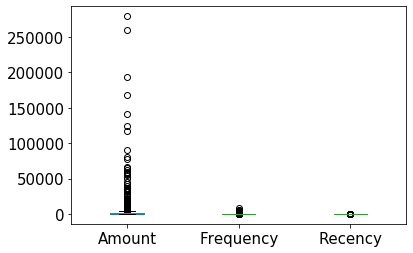

In [31]:
#draw boxplot to check for outliers
boxplot = RMF.boxplot(grid=False, vert=True, fontsize =15)

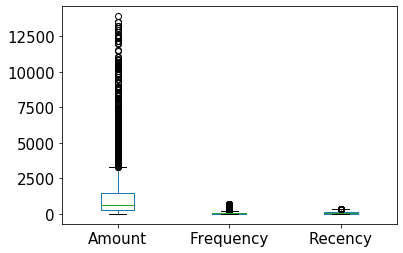

In [32]:
# Removing (statistical) outliers for Amount
Q1 = RMF.Amount.quantile(0.05)
Q3 = RMF.Amount.quantile(0.95)
IQR = Q3 - Q1
RMF = RMF[(RMF.Amount >= Q1 - 1.5*IQR) & (RMF.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = RMF.Recency.quantile(0.05)
Q3 = RMF.Recency.quantile(0.95)
IQR = Q3 - Q1
RMF = RMF[(RMF.Recency >= Q1 - 1.5*IQR) & (RMF.Recency <= Q3 + 1.5*IQR)]
RMF
# Removing (statistical) outliers for Frequency
Q1 = RMF.Frequency.quantile(0.05)
Q3 = RMF.Frequency.quantile(0.95)
IQR = Q3 - Q1
RMF = RMF[(RMF.Frequency >= Q1 - 1.5*IQR) & (RMF.Frequency <= Q3 + 1.5*IQR)]

#boxplot after Log transform
boxplot = RMF.boxplot(grid=False, vert=True, fontsize =15)


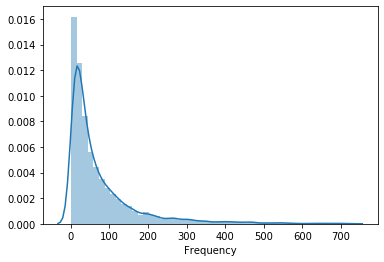

In [33]:
#freq distribiton
Frequency_Plot = RMF['Frequency']
ax = sns.distplot(Frequency_Plot)

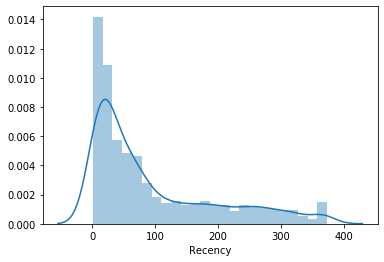

In [34]:
#rec distribiton
Recency_Plot = RMF['Recency']
ax = sns.distplot(Recency_Plot)

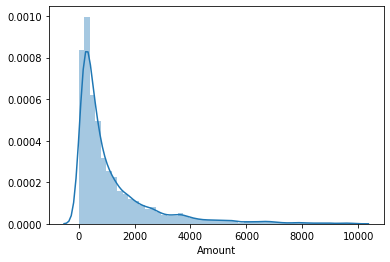

In [35]:
#mon distribiton
Monetary_Plot = RMF.query('Amount < 10000')['Amount']
ax = sns.distplot(Monetary_Plot)

In [36]:
#Handle negative and zero values so as to handle infinite numbers during log transformation 
def handel_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#Apply the handel_neg_n_zero function to Recency and Monetary coloumns
RMF['Recency'] = [handel_neg_n_zero(x) for x in RMF.Recency]
RMF['Monetary'] = [handel_neg_n_zero(x) for x in RMF.Amount]

#perform log transformation to bring data into normal or near normal distribution 
Log_Data = RMF[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

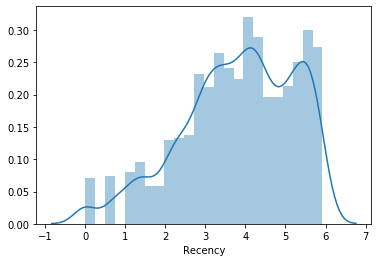

In [37]:
#F distribution after log transform
Recency_Plot = Log_Data['Recency']
ax = sns.distplot(Recency_Plot)

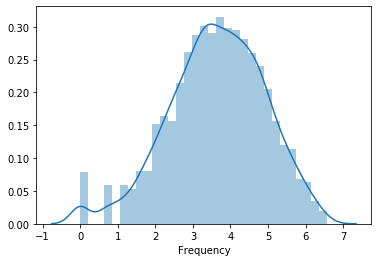

In [38]:
#R distribution after log transform
Frequency_Plot = Log_Data['Frequency']
ax = sns.distplot(Frequency_Plot)

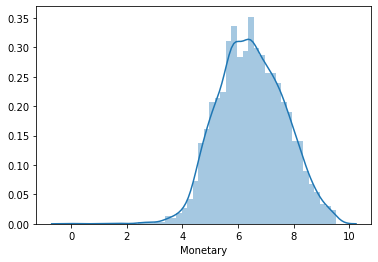

In [39]:
#M distribution after log transform
Monetary_Plot = Log_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

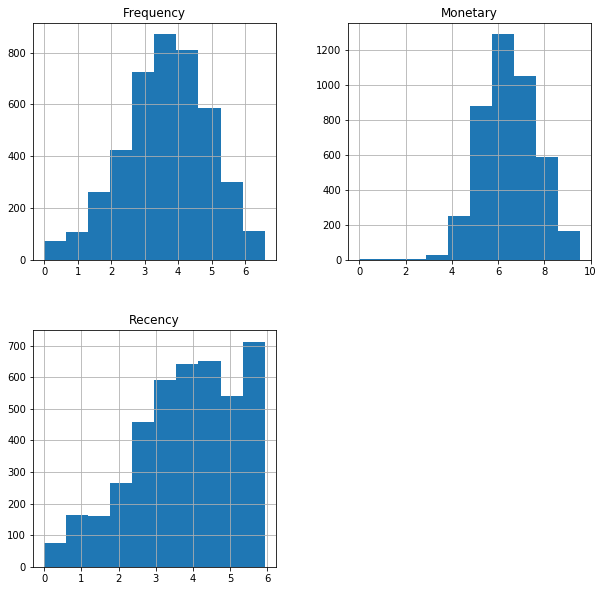

In [40]:
# histograms for log tranformed data
hist = Log_Data.hist(bins = 10, figsize=(10,10))


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

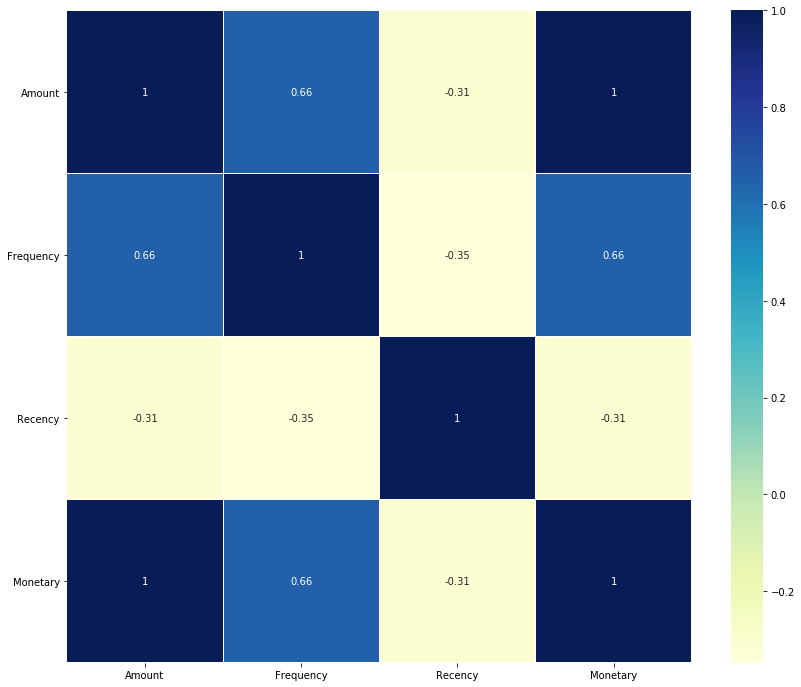

In [41]:
# heatmap for log tranformed data
plt.figure(figsize =(14,12))
sns.heatmap(RMF.corr(), linewidths =.1, cmap ="YlGnBu", annot= True)
plt.yticks(rotation =0)

In [42]:
#log transformed data Table 
Log_Data.describe().round(3)

,Recency,Frequency,Monetary
count,4258.000,4258.000,4258.000
mean,3.807,3.628,6.477
std,1.404,1.278,1.183
min,0.000,0.000,0.000
25%,2.944,2.833,5.677
50%,3.951,3.664,6.434
75%,4.977,4.554,7.319
max,5.924,6.581,9.541


In [58]:
#Applying Standardizede Scaling
# Rescaling the attributes
Log_Data_df = Log_Data[['Recency', 'Frequency', 'Monetary']]
# Instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(Log_Data)
rfm_df_scaled.shape

(4258, 4)

In [61]:
# Converting normalized rfm_df_scaled array to data frame 
rfm_scaled_dfr = pd.DataFrame({'Recency': rfm_df_scaled[:, 0],
                               'Frequency': rfm_df_scaled[:, 1], 
                               'Monetary': rfm_df_scaled[:, 1] })
rfm_scaled_dfr.head()

,Recency,Frequency,Monetary
0,-2.218979,1.233230,1.233230
1,0.363303,-0.151454,-0.151454
2,-0.615028,0.518201,0.518201
3,1.375124,-0.621620,-0.621620
4,-0.158996,0.637894,0.637894


### 4. Applying the k-means and hierarchical clustering algorithms

Ward’s method begins with n clusters, each containing a single object. These n clusters are merged to make one cluster containing all objects. At each step, the process makes a new cluster that minimizes variance, measured by an index called E (also called the sum of squares index).

At each step, the following calculations are made to find E:


1. Find the mean of each cluster.
2. Calculate the distance between each object in a particular cluster, and that cluster’s mean.
3. Square the differences from Step 2.
4. Sum (add up) the squared values from Step 3.
5. Add up all the sums of squares from Step 4.

## 1. Hierarchical clustering

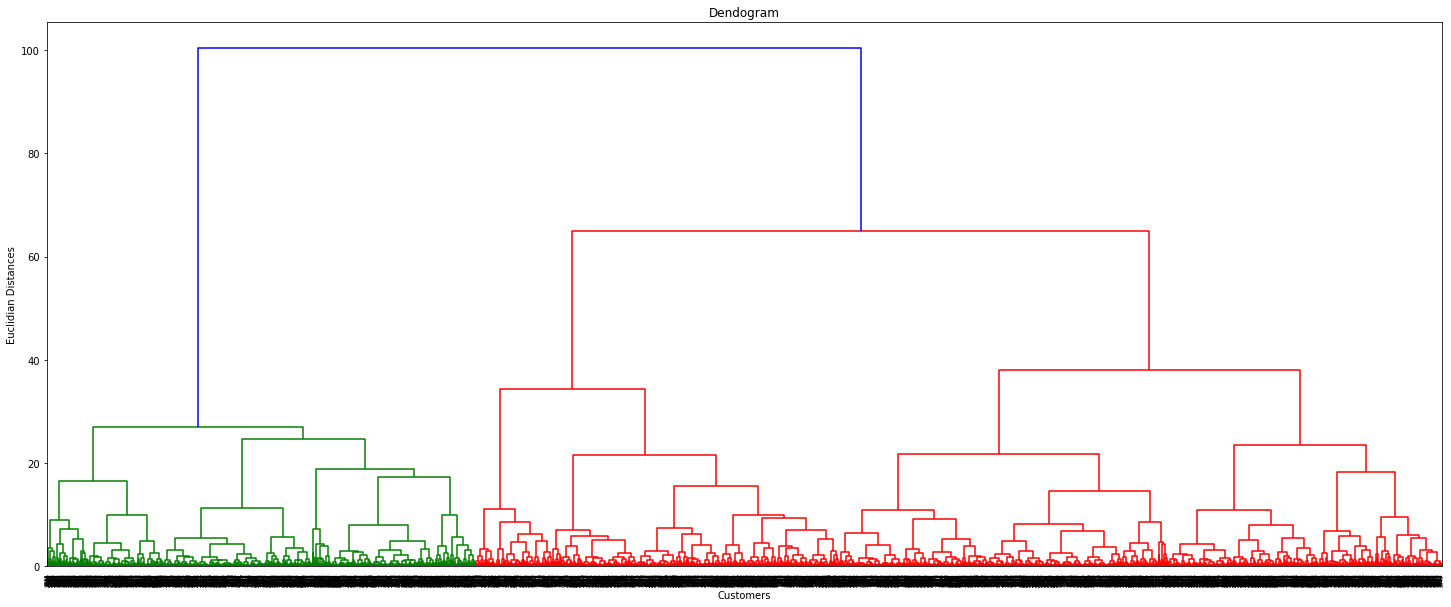

In [50]:
#draw dendogram for hierarchical clustering using ward's method
start_time_dn = time.time()
fig = plt.figure(figsize=(25, 10))
dendogram = sch.dendrogram(sch.linkage(rfm_df_scaled, method = 'ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidian Distances")
plt.show()

In [51]:
#exceution time for clustering
start_time_hc = time.time()
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(rfm_df_scaled)
time_taken_hc = time.time() - start_time_hc
print(time_taken_hc)

0.5405519008636475


In [52]:
#Dendogram Execution Time for clustering+ drawing dendogram
time_taken_dn = time.time() - start_time_dn
print(time_taken_dn)

208.51036643981934


      Recency  Frequency  Monetary  Label
1       0.693      5.204     8.355      1
2       4.317      3.434     7.488      0
3       2.944      4.290     7.449      1
4       5.737      2.833     5.796      2
5       3.584      4.443     7.810      1
...       ...        ...       ...    ...
4334    5.628      2.303     5.165      2
4335    5.198      1.946     4.357      2
4336    2.079      2.485     5.142      0
4337    1.386      6.581     7.425      1
4338    3.761      4.248     7.504      1

[4258 rows x 4 columns]


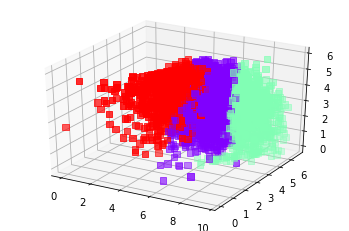

In [65]:
# 3D visualisation of clusters
rfm_labelled= Log_Data
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(rfm_df_scaled)
rfm_labelled['Label'] = y_hc
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_labelled['Monetary'])
y = np.array(rfm_labelled['Frequency'])
z = np.array(rfm_labelled['Recency'])
print (rfm_labelled)
ax.scatter(x,y,z, marker="s", c=rfm_labelled["Label"], s=40, cmap="rainbow")

In [66]:
# Silhouette, min and max and  Average for Ward Method
silhouette_avg = silhouette_score(rfm_df_scaled, y_hc)
print("For 3 cluster, The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(rfm_df_scaled, y_hc)
print ("Max silhouette_score is :", sample_silhouette_values.max())
print('Min silhouette_score is :', sample_silhouette_values.min())

For 3 cluster, The average silhouette_score is : 0.4582440536717648
Max silhouette_score is : 0.6707225114220401
Min silhouette_score is : -0.04540447493975594


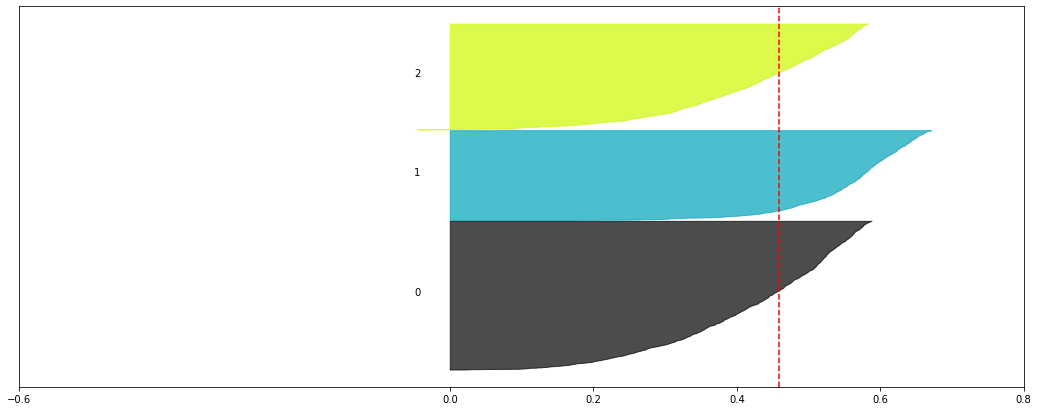

In [67]:
# Visualizing Silhouette Coefficient for Clusters 
from matplotlib import cm
range_n_clusters = [3]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.6, 0.8])
    

y_lower = 10
for i in range (n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_hc == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.6, 0, 0.2, 0.4, 0.6, 0.8])

## 2. k- means clustering

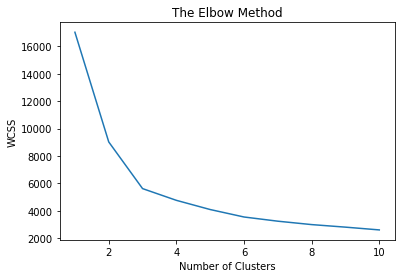

In [68]:
#Using The Elbow Method to Find Optimal Numbers of Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

1 : 1.881939865651878
2 : 1.3409263635046595
3 : 1.0320063889879376
4 : 0.9447295598358857
5 : 0.8777686944793904
6 : 0.8240286859060634
7 : 0.7812632684163755
8 : 0.7469020661892521
9 : 0.7191262491107141


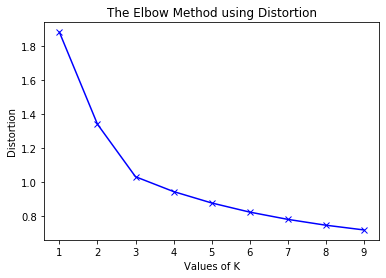

In [69]:
#Using The Different Values of Distortion

from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(rfm_df_scaled) 
	kmeanModel.fit(rfm_df_scaled)	 
	
	distortions.append(sum(np.min(cdist(rfm_df_scaled, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / rfm_df_scaled.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(rfm_df_scaled, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / rfm_df_scaled.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 


# Tabulating the results
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

# Visualizing the results
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

1 : 17032.0
2 : 9027.973592326602
3 : 5621.7544980735465
4 : 4765.816638623947
5 : 4094.1962205174136
6 : 3550.112142222882
7 : 3243.797613527892
8 : 2995.4589716866317
9 : 2793.271179592035


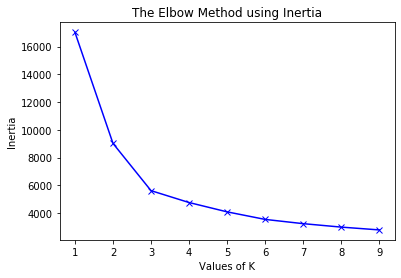

In [70]:
#Using the different values of Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [71]:
# Silhouette analysis
range_n_clusters_1 = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters_1:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48146636748486665
For n_clusters=3, the silhouette score is 0.4582067661323019
For n_clusters=4, the silhouette score is 0.3900973533918229
For n_clusters=5, the silhouette score is 0.34726012648202176
For n_clusters=6, the silhouette score is 0.32669871724453187
For n_clusters=7, the silhouette score is 0.32277264155914276
For n_clusters=8, the silhouette score is 0.3265477155863209


In [72]:
#K-Means Execution Time
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
start_time = time.time()
y_kmeans = kmeans.fit_predict(rfm_df_scaled)
time_taken = time.time() - start_time
print(time_taken)

0.13164353370666504


In [73]:
#Labelled RFM Table glance
rfm_scaled_dfr = pd.DataFrame({'recency': rfm_df_scaled[:, 0], 'freq': rfm_df_scaled[:, 1], 'monetary': rfm_df_scaled[:, 1] })
# assign the label
Log_Data['Cluster_Id'] = y_kmeans 
Log_Data.head()

,Recency,Frequency,Monetary,Label,Cluster_Id
1,0.693,5.204,8.355,1,1
2,4.317,3.434,7.488,0,0
3,2.944,4.290,7.449,1,1
4,5.737,2.833,5.796,2,2
5,3.584,4.443,7.810,1,1


      Recency  Frequency  Monetary  Label
1       0.693      5.204     8.355      1
2       4.317      3.434     7.488      0
3       2.944      4.290     7.449      1
4       5.737      2.833     5.796      2
5       3.584      4.443     7.810      1
...       ...        ...       ...    ...
4334    5.628      2.303     5.165      2
4335    5.198      1.946     4.357      2
4336    2.079      2.485     5.142      0
4337    1.386      6.581     7.425      1
4338    3.761      4.248     7.504      1

[4258 rows x 4 columns]


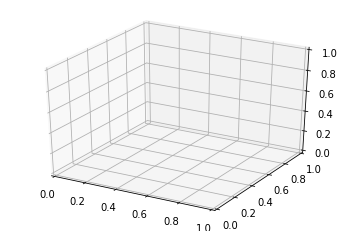

In [98]:
rfm_df_scaled_labelled_km= Log_Data_df
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = hc.fit_predict(rfm_df_scaled)


#Visualizing K-Mean Clusters

rfm_df_scaled_labelled_km['Label'] = y_kmeans
fig = plt.figure()
x = fig.add_subplot(111, projection='3d')
x = np.array(rfm_df_scaled_labelled_km['Monetary'])
y = np.array(rfm_df_scaled_labelled_km['Frequency'])
z = np.array(rfm_df_scaled_labelled_km['Recency'])
print (rfm_df_scaled_labelled_km)
ax.scatter(x,y,z, marker="s", c=rfm_df_scaled_labelled_km["Label"], s=40, cmap="rainbow")

In [94]:
#Average, min and max Silhouette Value for K-Means Clustering
silhouette_avg_kmeans = silhouette_score(rfm_df_scaled, y_kmeans)
print("For 3 cluster, The average silhouette_score is :", silhouette_avg_kmeans)
sample_silhouette_values_kmeans = silhouette_samples(rfm_df_scaled, y_kmeans)
print ("Max silhouette_score is :", sample_silhouette_values_kmeans.max())
print('Min silhouette_score is :', sample_silhouette_values_kmeans.min())

For 3 cluster, The average silhouette_score is : 0.4582440536717648
Max silhouette_score is : 0.6707225114220401
Min silhouette_score is : -0.04540447493975594


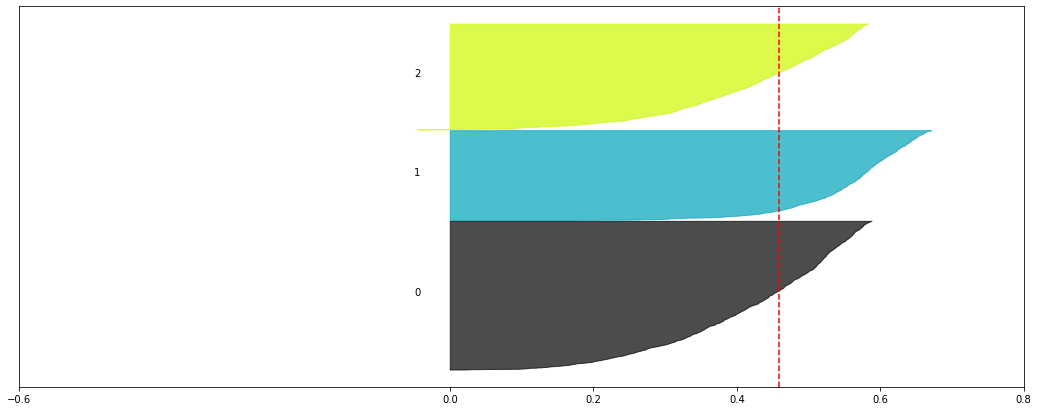

In [95]:
# Silhouette Graph for K-Means Clusters 
from matplotlib import cm
range_n_clusters = [3]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.6, 0.8])
    

y_lower = 10
for i in range (n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values_kmeans[y_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.6, 0, 0.2, 0.4, 0.6, 0.8])


### 5.Comparing the results 


In [96]:
#@title Cluster Similarity between k-means and hierarchical clustering
sklearn.metrics.adjusted_rand_score(y_hc, y_kmeans)

1.0

K-means: K Means can handle large datasets with low computational time.

Hierarchical: Hierarchical clustering handle smaller datasets really well but with large datasets, computation time is higher that k-means. The adjusted random score gives the value of similarity. This adjusted random score between K hierarchical clustering is around 96%.

Hence, this is the model we are going to be using for out system.
We first computed the aggolmerative hierarchal clustering usign Ward's method
This  divided the data into 3 clusters.
The elbow plot also showed 3 as the best k-value.
Hence, we can use 3 as our k value for k-means
Next, we computed the k-means algorithm, which runs iteratively until a it creates the 3 clusters.
Hence, These are the clusters that will be used output in the customer segmentation system. 

### 6. How this is going to be use this in the customer segmentation system system

The output is displayed with the RFM score of each cluster and the predicted CLV(Customer Lifetime Value)